# **Task_6 ( House Price Prediction )**
The goal of this task is to predict the prices of houses using some important features like the size of the house, number of bedrooms, number of bathrooms, and the location of the house and predict the price.

Objective:
to build a machine learning model that can learn from past house data and estimate the price of a house based on these features.  

**First import all libraries**

In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

Load dataset
using kaggle ( https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset )

In [2]:
data = pd.read_csv("/content/House Price Prediction Dataset.csv")
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


Data info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


Dropdown

In [4]:
area_values = ['None'] + sorted(data['Area'].unique())
area_dd = widgets.Dropdown(
    options=area_values,
    value=area_values[1],   # first real area (not None)
    description='Area'
)

# Simple helper for other dropdowns
def dd(col):
    return widgets.Dropdown(
        options=['None'] + sorted(data[col].unique()),
        value='None',
        description=col
    )

bed_dd  = dd("Bedrooms")
bath_dd = dd("Bathrooms")
loc_dd  = dd("Location")

#Filter function

def filter_data(Area, Bedrooms, Bathrooms, Location):
    df = data.copy()

    if Area != 'None':
        df = df[df["Area"] == Area]
    if Bedrooms != 'None':
        df = df[df["Bedrooms"] == Bedrooms]
    if Bathrooms != 'None':
        df = df[df["Bathrooms"] == Bathrooms]
    if Location != 'None':
        df = df[df["Location"] == Location]

    # Show only first 10 columns (avoid big output)
    df = df.iloc[:, :10]

    display(df)

# Interactive UI
widgets.interact(
    filter_data,
    Area=area_dd,
    Bedrooms=bed_dd,
    Bathrooms=bath_dd,
    Location=loc_dd
)

interactive(children=(Dropdown(description='Area', index=1, options=('None', np.int64(501), np.int64(502), np.…

<function __main__.filter_data(Area, Bedrooms, Bathrooms, Location)>

In [5]:
y = data["Price"]
X = data[["Area", "Bedrooms", "Bathrooms", "Location"]]

In [6]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # <- sparse_output

# Fit + transform both Area and Location
encoded_cols = encoder.fit_transform(X[["Area", "Location"]])

# Convert encoded matrix → DataFrame
encoded_df = pd.DataFrame(
    encoded_cols,
    columns=encoder.get_feature_names_out(["Area", "Location"]),
    index=X.index
)

# Remove original Area and Location & merge new encoded columns
X_encoded = pd.concat([X.drop(["Area", "Location"], axis=1), encoded_df], axis=1)

# Check output
X_encoded.head()


,Bedrooms,Bathrooms,Area_501,Area_502,Area_503,Area_504,Area_505,Area_509,Area_510,Area_511,...,Area_4993,Area_4994,Area_4995,Area_4996,Area_4997,Area_4999,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban
0,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# X_encoded banane ke baad (sare categorical columns encode ho gaye)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Check if any column is still object/string
print(X_train.dtypes)  # Sab numeric (int/float) hona chahiye

Bedrooms               int64
Bathrooms              int64
Area_501             float64
Area_502             float64
Area_503             float64
                      ...   
Area_4999            float64
Location_Downtown    float64
Location_Rural       float64
Location_Suburban    float64
Location_Urban       float64
Length: 1628, dtype: object


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
print("Model trained successfully!")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Model trained successfully!
Intercept: 479026.05634305644
Coefficients: [  2747.97621339  18308.90902044 162284.89137425 ...  53220.23840871
 -18633.41716631 -34601.05081761]


In [10]:
y_pred = model.predict(X_test)

In [11]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 261443.61310527512
RMSE: 311788.4373235389


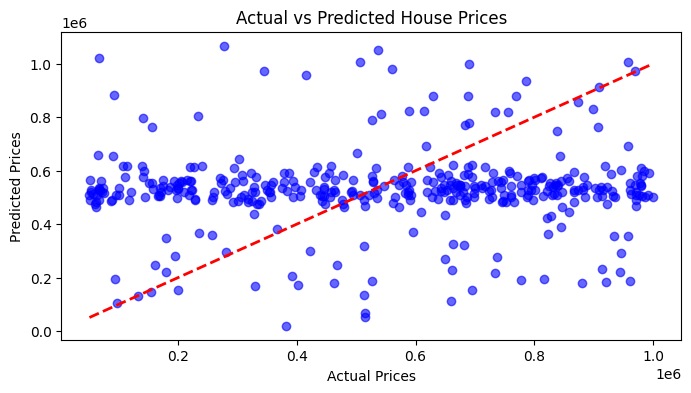

In [12]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.show()